# Sentiment Analysis

In [ ]:
import PyPDF2
import os
import re
from googletrans import Translator
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer


In [ ]:
# Function to extract text from a single PDF file
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfFileReader(file)
        text = ""
        for page in range(reader.numPages):
            text += reader.getPage(page).extractText()
    return text

# Function to translate text from Russian to English
def translate_text_to_english(text, source_language='ru'):
    if not text:  # Checks if the text is None or empty
        return ""

    translator = Translator()
    try:
        translation = translator.translate(text, src=source_language, dest='en')
        return translation.text
    except Exception as e:
        print(f"Error during translation: {e}")
        return ""


# Function to preprocess the text
def preprocess_text(text):
    text = re.sub(r'\s+', ' ', text)  # emoving extra spaces
    return text

In [ ]:
# Sentiment analysis function
def analyze_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    compound_score = sentiment_scores['compound']
    
    if compound_score >= 0.05:
        return "Positive", compound_score
    elif compound_score <= -0.05:
        return "Negative", compound_score
    else:
        return "Neutral", compound_score


# Placeholder for additional analysis function
def perform_additional_analysis(texts):
    # Implement additional analysis techniques
    pass

def read_pdfs_from_directory(directory):
    texts = []
    for filename in os.listdir(directory):
        if filename.endswith('.pdf'):
            path = os.path.join(directory, filename)
            russian_text = extract_text_from_pdf(path)
            print(f"Extracted text from {filename}: {russian_text[:100]}...")  # Print first 100 characters
            english_text = translate_text_to_english(russian_text)
            texts.append(english_text)
    return texts

In [ ]:
# Main execution for sentiment analysis
directory_path = "/home//dev/dev/research/GeospatialAnalysis/library"
texts = read_pdfs_from_directory(directory_path)
processed_texts = [preprocess_text(text) for text in texts]
sentiments = [analyze_sentiment(text) for text in processed_texts]

# Perform Sentiment Analysis
for sentiment in sentiments:
    print(f"Sentiment: {sentiment[0]}, Compound Score: {sentiment[1]}")

In [ ]:
import os
import re
import PyPDF2
from googletrans import Translator
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Function to extract text from a single PDF file
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfFileReader(file)
        text = ""
        for page in range(reader.numPages):
            text += reader.getPage(page).extractText()
    return text

# Function to preprocess the text
def preprocess_text(text):
    text = re.sub(r'\s+', ' ', text)  # Example: Removing extra spaces
    return text

# Sentiment analysis function using NLTK's VADER
def analyze_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    compound_score = sentiment_scores['compound']
    
    if compound_score >= 0.05:
        return "Positive", compound_score
    elif compound_score <= -0.05:
        return "Negative", compound_score
    else:
        return "Neutral", compound_score

# Function to translate text from Russian to English
def translate_text_to_english(text, source_language='ru'):
    if not text:  # Checks if the text is None or empty
        return ""
    translator = Translator()
    try:
        translation = translator.translate(text, src=source_language, dest='en')
        return translation.text
    except Exception as e:
        print(f"Error during translation: {e}")
        return ""

# Function to read and process all PDFs in a directory
def read_pdfs_from_directory(directory):
    texts = []
    for filename in os.listdir(directory):
        if filename.endswith('.pdf'):
            path = os.path.join(directory, filename)
            text = extract_text_from_pdf(path)
            texts.append(text)
    return texts

# Main execution
def main():
    directory_path = "/home/dev/dev/research/GeospatialAnalysis/library"
    texts = read_pdfs_from_directory(directory_path)
    processed_texts = [preprocess_text(text) for text in texts]
    sentiments = [analyze_sentiment(text) for text in processed_texts]

    # Translating texts after sentiment analysis
    translated_texts = [translate_text_to_english(text) for text in processed_texts]

    # Output results
    for sentiment, translated_text in zip(sentiments, translated_texts):
        print(f"Sentiment: {sentiment[0]}, Compound Score: {sentiment[1]}")
        print(f"Translated Text (Excerpt): {translated_text[:200]}...\n")  # Print first 200 characters of the translated text

if __name__ == "__main__":
    main()


# Spreadsheet Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:

def read_and_prepare_data(filepath):
    df = pd.read_excel(filepath)

    # Assuming the file has columns like 'Year', 'Hours', and maybe others
    # If there are other important columns or preprocessing steps, add them here
    return df

def create_visualizations(df):
    # Visualization 1: Line plot of average hours per week over the years
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='Year', y='Hours')
    plt.title('Average Hours per Week Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Average Hours')
    plt.show()

    # Add more visualizations based on your data and requirements
    # For example, if there are different categories or groups, you might
    # want to create separate plots for each category

def perform_statistical_analysis(df):
    # Descriptive statistics
    summary = df.describe()
    print("Descriptive Statistics:\n", summary)

    # Check for correlation
    correlation = df.corr()
    print("\nCorrelation Matrix:\n", correlation)

    # More complex analyses can be added here, like regression analysis, 
    # if relevant to your data


In [ ]:
def main():
    filepath = '/home/dev/dev/research/GeospatialAnalysis/Hours per week.xlsx'
    df = read_and_prepare_data(filepath)
    create_visualizations(df)
    perform_statistical_analysis(df)

if __name__ == "__main__":
    main()

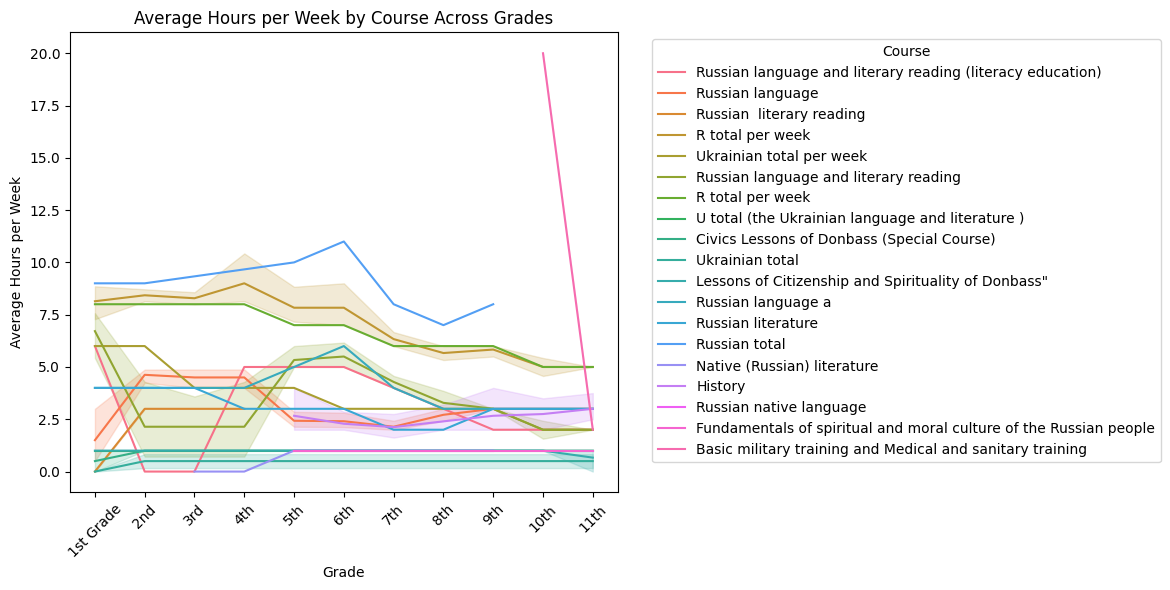

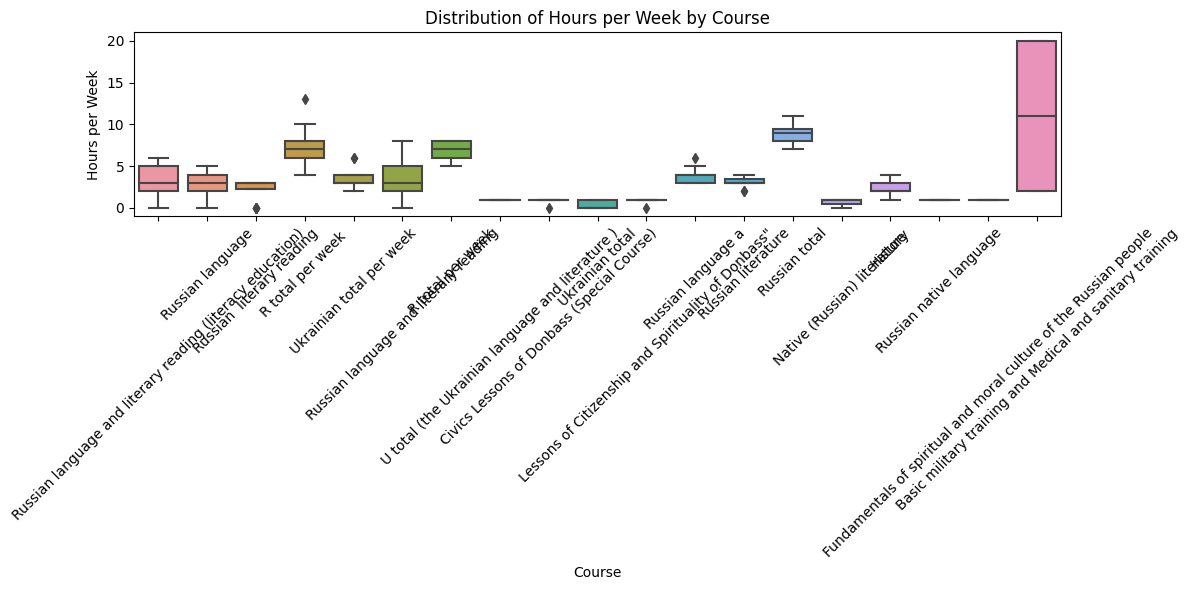

Descriptive Statistics by Course:
                                                     count       mean  \
Course                                                                 
Basic military training and Medical and sanitar...   16.0  11.000000   
Civics Lessons of Donbass (Special Course)           22.0   0.954545   
Fundamentals of spiritual and moral culture of ...    7.0   1.000000   
History                                              34.0   2.470588   
Lessons of Citizenship and Spirituality of Donb...   23.0   0.956522   
Native (Russian) literature                           7.0   0.714286   
R total per week                                     11.0   6.727273   
R total per week                                     72.0   7.055556   
Russian  literary reading                            20.0   2.250000   
Russian language                                     84.0   3.098214   
Russian language a                                   11.0   3.909091   
Russian language and literary

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def read_and_prepare_data(filepath):
    # Read the cleaned Excel file
    df = pd.read_excel(filepath)
    return df

def create_visualizations(df):
    # Visualization 1: Line plot of average hours per week for each course over all grades
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='Grade', y='Hours per Week', hue='Course')
    plt.title('Average Hours per Week by Course Across Grades')
    plt.xlabel('Grade')
    plt.ylabel('Average Hours per Week')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend(title='Course', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Visualization 2: Box plot of hours per week for each course
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='Course', y='Hours per Week')
    plt.title('Distribution of Hours per Week by Course')
    plt.xlabel('Course')
    plt.ylabel('Hours per Week')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def perform_statistical_analysis(df):
    # Descriptive statistics
    summary = df.groupby('Course')['Hours per Week'].describe()
    print("Descriptive Statistics by Course:\n", summary)

def main():
    filepath = '/home/dev/dev/research/GeospatialAnalysis/data/Cleaned_Hours_per_week.xlsx'  # Update with the correct file path
    df = read_and_prepare_data(filepath)
    create_visualizations(df)
    perform_statistical_analysis(df)

if __name__ == "__main__":
    main()
